<font size=6><b> lec06.머신러닝 : 평가 매트릭스 : Multiclass case

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
sns.set()


# Data Load

## make_classification() 
* ref : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

<pre>
n_samples : 표본 데이터의 수, 디폴트 100
+ n_features : 독립 변수의 수, 디폴트 20
     - n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
     - n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
     - n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
+ n_classes : 종속 변수의 클래스 수, 디폴트 2
+ n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
weights : 각 클래스에 할당된 표본 수
random_state : 난수 발생 시드

In [1]:
#n_classes=3 빼고 이진과 바뀐거 없음

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# ------------------------------------------------------------------------------------------------------------
# "Number of informative, redundant and repeated features" must sum to less than the number of "total features"
# "n_classes(3) * n_clusters_per_class(1)"  must be smaller or equal  "2**n_informative(2)=4"
# ------------------------------------------------------------------------------------------------------------
X, y = make_classification(n_samples=16, n_features=2, 
                           n_informative=2, n_classes=3,                #---------(16*2) target 멀티분류(0,1,2)
                           n_clusters_per_class=1, n_redundant=0,
                           # weights=[0.9, 0.1],                        #--------- 비대칭 데이터
                           random_state=1111)

X, y

(array([[ 0.33697474, -2.69623724],
        [ 1.86953492,  1.20111224],
        [ 0.66204133, -1.73028707],
        [-1.24949312,  0.75621845],
        [-1.27616934,  1.42348431],
        [ 0.72204137, -0.644468  ],
        [ 0.15827256, -0.42481334],
        [ 1.60563018,  0.72606437],
        [ 1.04699717, -1.62980463],
        [ 1.89947555,  2.24057858],
        [ 1.56279032, -1.77071591],
        [-0.37965959,  1.5685585 ],
        [ 0.26356466, -0.49556254],
        [-1.34537848,  0.59737042],
        [-0.8569889 ,  0.79892386],
        [ 0.44922602, -0.37569981]]),
 array([1, 0, 1, 2, 2, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 1]))

In [2]:
# 바이너리성이 아닌, 1종 2종 3종 각각을 보고싶을때는 나 빼고 아닌걸 골라주는 OVR / OVS 사용
#OneVsRest --- 더효율적이어서 많이씀
#OneVsOne

In [3]:
model = LogisticRegression().fit(X, y)
pred = model.predict(X)
fval = model.decision_function(X)
print(pred.shape, fval.shape)

df = pd.DataFrame(np.column_stack((y,pred, fval)), columns=["정답", "예측","함수판별값_C0", "함수판별값_C1","함수판별값_C2"])
df.sort_values("함수판별값_C1", ascending=False).reset_index(drop=True)

(16,) (16, 3)


,정답,예측,함수판별값_C0,함수판별값_C1,함수판별값_C2
0,1.0,1.0,0.017249,2.700656,-2.717905
1,1.0,1.0,1.200127,1.945176,-3.145303
2,1.0,1.0,0.466186,1.855737,-2.321923
3,1.0,1.0,0.801959,1.788612,-2.590571
4,0.0,1.0,0.719412,0.887907,-1.607319
5,0.0,1.0,0.369929,0.727581,-1.097510
6,0.0,1.0,0.296530,0.658061,-0.954591
7,1.0,1.0,0.545273,0.631331,-1.176605
8,0.0,0.0,1.704094,-0.285921,-1.418173
9,2.0,2.0,-0.749447,-0.345316,1.094763


## read_csv()

In [4]:
df = pd.read_csv("./dataset/iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### 샘플링(N개)

In [6]:
dfs_1 = df[df['target']==1].sample(n=3, random_state=1111)
print(dfs_1.shape)
dfs_1.head()

(3, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
76,6.8,2.8,4.8,1.4,1
65,6.7,3.1,4.4,1.4,1
53,5.5,2.3,4.0,1.3,1


### 샘플링(N%)

In [7]:
dfs = df.sample(frac=0.10, random_state=1111)
print(dfs.shape)
dfs.head()

(15, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
49,5.0,3.3,1.4,0.2,0
122,7.7,2.8,6.7,2.0,2
12,4.8,3.0,1.4,0.1,0
70,5.9,3.2,4.8,1.8,1
100,6.3,3.3,6.0,2.5,2


In [8]:
dfs["target"].value_counts()

1    7
0    4
2    4
Name: target, dtype: int64

* 샘플링 값이 다를 경우 아래 코드 실행
* print(dfs.values.tolist())

In [9]:
# slist = [[5.0, 3.3, 1.4, 0.2, 0.0], [7.7, 2.8, 6.7, 2.0, 2.0], [4.8, 3.0, 1.4, 0.1, 0.0], [5.9, 3.2, 4.8, 1.8, 1.0], [6.3, 3.3, 6.0, 2.5, 2.0], [6.3, 2.5, 4.9, 1.5, 1.0], [5.5, 3.5, 1.3, 0.2, 0.0], [5.7, 2.8, 4.1, 1.3, 1.0], [5.5, 2.6, 4.4, 1.2, 1.0], [5.7, 2.6, 3.5, 1.0, 1.0], [5.8, 2.6, 4.0, 1.2, 1.0], [5.8, 2.7, 5.1, 1.9, 2.0], [5.5, 4.2, 1.4, 0.2, 0.0], [5.4, 3.0, 4.5, 1.5, 1.0], [6.4, 2.8, 5.6, 2.1, 2.0]]
# temp = pd.DataFrame(slist, columns=dfs.columns)
# temp['target'] = temp['target'].astype("int")
# temp.head()

# 모델 학습

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

In [11]:
y = dfs['target']
X = dfs.drop(['target'], axis=1)
model = LogisticRegression().fit(X, y)
model = LogisticRegression().fit(X, y)
pred = model.predict(X)
proba = model.predict_proba(X)
fval = model.decision_function(X)
print(pred.shape, fval.shape)

(15,) (15, 3)


# 평가

## 판별함수 값
* predict_proba(), decision_function()

In [12]:
df = pd.DataFrame(np.column_stack((y,pred, fval)), columns=["정답", "예측", "함수판별값_C0", "함수판별값_C1","함수판별값_C2"])
df.sort_values("함수판별값_C1", ascending=False).reset_index(drop=True)

,정답,예측,함수판별값_C0,함수판별값_C1,함수판별값_C2
0,1.0,1.0,-1.268420,1.592717,-0.324298
1,1.0,1.0,-0.118655,1.514727,-1.396072
2,1.0,1.0,-0.855798,1.512870,-0.657071
3,1.0,1.0,-2.267822,1.509761,0.758061
4,0.0,0.0,3.259479,1.469651,-4.729130
5,2.0,1.0,-2.516875,1.457569,1.059306
6,1.0,1.0,-0.937566,1.452981,-0.515416
7,1.0,1.0,-1.384607,1.430868,-0.046260
8,2.0,2.0,-3.350994,1.355879,1.995114
9,0.0,0.0,3.254907,1.327139,-4.582045


* 기준값(threshold)>0 : 양성(Positive)
* 기준값(threshold)<0 : 음성(negative)
* 기준값(threshold)을 얼마로 설정하냐에 따라 성능평가 점수가 달라진다

## confusion_matrix()
* ref : https://ai-creator.tistory.com/579

<img src="https://velog.velcdn.com/images%2Fhajeongjj%2Fpost%2F31affec5-a47b-4ff0-b07d-73943729dbc3%2Fimage.png" width=800>

<img src="https://docs.microsoft.com/en-us/dynamics365/finance/finance-insights/media/payment-prediction-matrix-2.png" width=600>

In [13]:
confusion_matrix(y, pred)

array([[4, 0, 0],
       [0, 7, 0],
       [0, 1, 3]], dtype=int64)

In [14]:
recall0 = 4 / (4 + 0 + 0)
recall1 = 7 / (0 + 7 + 0)
recall2 = 3 / (0 + 1 + 3)

fallout0 = 0 / (4 + 0 + 0)
fallout1 = 0 / (0 + 7 + 0)
fallout2 = 1 / (0 + 1 + 3)

print("recall =" , recall0,  recall1,  recall2,  round((recall0+recall1+recall2)/3,2) )
print("fallout =", fallout0, fallout1, fallout2, round((fallout0+fallout1+fallout2)/3,2) )

recall = 1.0 1.0 0.75 0.92
fallout = 0.0 0.0 0.75 0.25


## classification_report()

In [15]:
# print(  classification_report(y, pred, digits=3)  )
print(  classification_report(y, pred )  )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.88      1.00      0.93         7
           2       1.00      0.75      0.86         4

    accuracy                           0.93        15
   macro avg       0.96      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15



## roc_curve()
* ref : https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.htmlhttps://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

(6,) (6, 3)


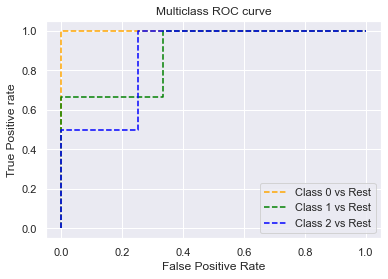

In [17]:
df = pd.read_csv("./dataset/iris.csv")
df.head()
y = dfs['target']
X = dfs.drop(['target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1111)
model = LogisticRegression().fit(X_train, y_train)
pred = model.predict(X_test)
proba = model.predict_proba(X_test)
fval = model.decision_function(X_test)
print(pred.shape, fval.shape)


# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

## AUC(Area Under the Curve)
* ROC curve 아래 면적
* 이진분류일경우 1(p)
  roc_auc_score(y, model.predict_proba(X)[:,1])
* 멀티분류일 경우 각 클래스가 한번씩 P
  roc_auc_score(y, proba, multi_class="ovr", average="macro")

In [18]:
proba = model.predict_proba(X)
roc_auc_score(y, proba, multi_class="ovo", average="macro")    # 또는 OVR

0.9880952380952381